## Business Problem
An online retailer wants to optimize profit margin based on visitors intent of purchase. The retailer setting up a personalized customer experience where a visitor who is identified as some one that will make a purchase may not receive a discount. On the other hand a  visitor who is identified as some one that does not intent on purchasing may be offered a promotional discount to incentivize the visitor to make a purchase. 

Why an onlibe retailer would want to know a visotor's intent to purchase?

### Customer Purchase Intention: Definition, Why (+ How) to Measure & Convert
https://www.namogoo.com/blog/consumer-behavior-psychology/customer-purchase-intention/

### Know What Your Customers Want Before They Do
https://hbr.org/2011/12/know-what-your-customers-want-before-they-do




source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.


Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 

"Administrative",
"Administrative Duration", 
"Informational", 
"Informational Duration", 
"Product Related" 
and "Product Related Duration" 
represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.


"Bounce Rate", 
"Exit Rate" 
and "Page Value" 
features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" 
feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

link to paper 'Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks'
https://link.springer.com/article/10.1007/s00521-018-3523-0
Abstract:
In this paper, we propose a real-time online shopper behavior analysis system consisting of two modules which simultaneously predicts the visitor’s shopping intent and Web site abandonment likelihood. In the first module, we predict the purchasing intention of the visitor using aggregated pageview data kept track during the visit along with some session and user information. The extracted features are fed to random forest (RF), support vector machines (SVMs), and multilayer perceptron (MLP) classifiers as input. We use oversampling and feature selection preprocessing steps to improve the performance and scalability of the classifiers. The results show that MLP that is calculated using resilient backpropagation algorithm with weight backtracking produces significantly higher accuracy and F1 Score than RF and SVM. Another finding is that although clickstream data obtained from the navigation path followed during the online visit convey important information about the purchasing intention of the visitor, combining them with session information-based features that possess unique information about the purchasing interest improves the success rate of the system. In the second module, using only sequential clickstream data, we train a long short-term memory-based recurrent neural network that generates a sigmoid output showing the probability estimate of visitor’s intention to leave the site without finalizing the transaction in a prediction horizon. The modules are used together to determine the visitors which have purchasing intention but are likely to leave the site in the prediction horizon and take actions accordingly to improve the Web site abandonment and purchase conversion rates. Our findings support the feasibility of accurate and scalable purchasing intention prediction for virtual shopping environment using clickstream and session information data.


### Feature Selection

* Python Feature Selection Tutorial: A Beginner's Guide
https://www.datacamp.com/tutorial/feature-selection-python

* https://scikit-learn.org/stable/modules/feature_selection.html



In [212]:
# Import libraries needed

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix 



%matplotlib inline

In [213]:
# Read 'online_shoppers_intention.csv' file

file = 'data/online_shoppers_intention.csv'
shopper = pd.read_csv(file)
shopper


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [214]:
# Check data types for columns

shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [215]:
# Check any colums has any null

shopper.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [216]:
# Check whether any record has duplicates

shopper[shopper.duplicated()]



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [217]:
shopper.drop(shopper[shopper.duplicated()].index,inplace=True)
shopper.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

Column name: Revenue
False    10297
True      1908
Name: Revenue, dtype: int64


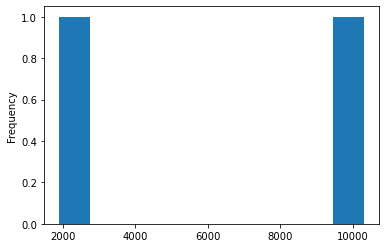

In [218]:
# Identify columns as continous or categorical

# Administrative: categorical value from 0 27, about 5643 records zero 
# Administrative_Duration: continous, about 5778 records with value of zero
# Informational: categorical value from 0 to 16, about 9574 records are zero
# Informational_Duration: continous, about 9800 records are zero
# ProductRelated: continous, max value around 500
# ProductRelated_Duration: continous
# BounceRates: continous, about 5518 records are zero
# ExitRates: continous
# PageValues: continous, about 9475 records are zero
# SpecialDay: categorical, 0, 0.2, 0.4, 0.6, 0.8 and 1, about 10956 records are zero
# Month: categorical, 10 months: Feb,Mar, May, June, Jul, Aug, Sep, Oct, Nov
# OperatingSystems: categorical, about 6541 records have value of 2 (values from 1-8)
# Browser: categorical, about 7883 records have a value of 2 (value from 1-13)
# Region: categorical, (values from 1-9)
# TrafficType: categorical (values fro 1-20)
# VisitorType: categorical, about 10431 records are returning visitors(Returning_visitor, 
#              New_visitor,Other), 
# Weekend: categorical/boolean, about 9346 records weekend false (true or false)
# Revenue: categorical/boolean,target, about 10297 records revenue false (true or false)

column_names = shopper.columns
col_num = 17
print(f'Column name: {column_names[col_num]}')
print(shopper[column_names[col_num]].value_counts())
shopper[column_names[col_num]].value_counts().plot.hist();


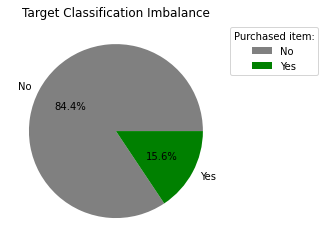

In [219]:
# Show imbalance of target
fig, axs = plt.subplots()
axs.pie(shopper['Revenue'].value_counts(normalize=True),labels=['No','Yes'],autopct='%1.1f%%',
       colors=['grey','green']);
axs.set_title('Target Classification Imbalance')
axs.legend(title='Purchased item:',bbox_to_anchor=(1,1));


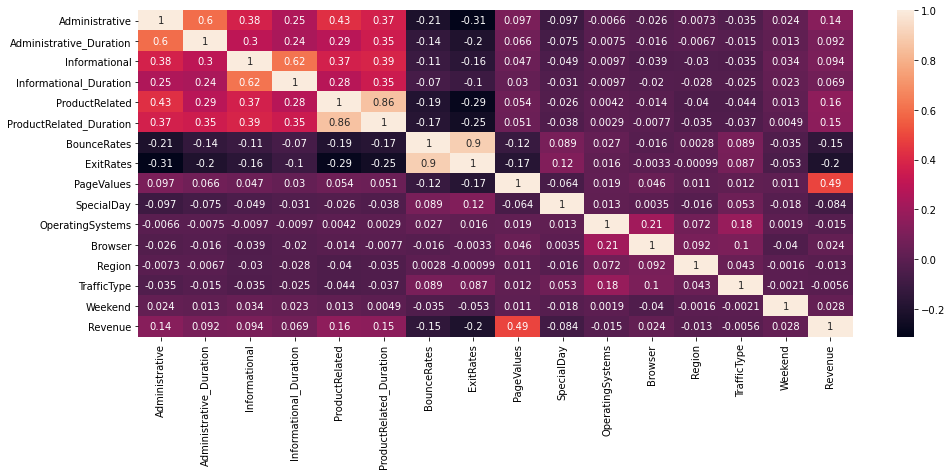

In [220]:
# Check correlation values
# Collinearity between (ProductRelate_Duration,ProductRelated), (ExitRates,BounceRates)

plt.figure(figsize=(16,6))
sns.heatmap(shopper.corr(),annot=True);


In [221]:
# Modify values 'Revenue' column where False is 0 and True is 1

lb = LabelEncoder()
shopper['mod_Revenue'] = lb.fit_transform(shopper['Revenue'])
shopper['mod_Revenue'].value_counts(normalize=True)


0    0.843671
1    0.156329
Name: mod_Revenue, dtype: float64

In [222]:
# Split data into train and test data set
X = shopper.drop(['Revenue','mod_Revenue'],axis=1)
y = shopper['mod_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,
                                                    random_state=4321)

In [223]:
# Setup numerical and categorical pipeline and incorporate both into
# ColumnTransformer

# https://stackoverflow.com/questions/54646709/sklearn-pipeline-get-feature-names-after-onehotencode-in-columntransformer
# https://bbakiu.medium.com/extracting-feature-names-from-the-columntransformer-f1bed520aeba
# https://johaupt.github.io/blog/columnTransformer_feature_names.html

nums_pipe = Pipeline([('ss',StandardScaler())])
nums_pipe2 = Pipeline([('mm',MinMaxScaler())])
cats_pipe = Pipeline([('ohe',OneHotEncoder(sparse=False))])

trans = ColumnTransformer([('nums',nums_pipe,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

trans2 = ColumnTransformer([('nums2',nums_pipe2,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

X_train_processed = trans.fit_transform(X_train)  # for numerics use StandardScaler
X_test_processed = trans.transform(X_test)

X_train_processed2 = trans2.fit_transform(X_train) # for numerics use MinMaxScaler
X_test_processed2 = trans2.transform(X_test)


In [224]:
# Incorporate processed X_train and X_test into dataframe (if there is a need for later)

num_col_names = trans.transformers_[0][2] 
cat_col_names = ['x0_Aug','x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar', 'x0_May', 
                 'x0_Nov','x0_Oct', 'x0_Sep', 'x1_New_Visitor', 'x1_Other',
                 'x1_Returning_Visitor', 'x2_False', 'x2_True']

col_names = num_col_names + cat_col_names

X_train_process_df = pd.DataFrame(X_train_processed,columns=col_names,
                                 index=X_train.index)
X_test_process_df = pd.DataFrame(X_test_processed,columns=col_names,
                                index=X_test.index)

X_train_process_df2 = pd.DataFrame(X_train_processed2,columns=col_names,
                                 index=X_train.index)
X_test_process_df2 = pd.DataFrame(X_test_processed2,columns=col_names,
                                index=X_test.index)


In [14]:
# Identify X_train features whether categorical / boolean or continous for prcessing

#X_cats = X_train.select_dtypes(['object','bool'])
#X_nums = X_train.select_dtypes(['int64','float64'])

In [77]:
# Process X_cats with OneHotEncoder and and X_nums with StandardScaler
# transform X_test

#ohe = OneHotEncoder(sparse=False)
#ohe.fit(X_train.select_dtypes(['object','bool']))
#X_train_cats_ohe = ohe.transform(X_train.select_dtypes(['object','bool']))
#X_test_cats_ohe = ohe.transform(X_train.select_dtypes(['object','bool']))

#ss = StandardScaler()
#ss.fit(X_train.select_dtypes(['int64','float64']))
#X_train_nums_ss = ss.transform(X_train.select_dtypes(['int64','float64']))
#X_test_nums_ss = ss.transform(X_test.select_dtypes(['int64','float64']))


In [133]:
# Combine X_train_cats_ohe and X_train_nums_ss = ss.transform into a single dataframe
# ===> NEED to combine X_test_cats_ohe and X_test_nums_ss = ss.transform into a single dataframe

#X_train_cats_processed = pd.DataFrame(X_train_cats_ohe,index=X_train.index,
#                                columns=ohe.get_feature_names())

#X_train_nums_processed = pd.DataFrame(X_train_nums_ss,index=X_train.index,
#                                     columns=X_train.select_dtypes(['int64','float64']).columns)

#X_train_processed2 = pd.concat([X_train_nums_processed,X_train_cats_processed],axis=1)


In [225]:
def feature_ranking(features,ranking,ascend):
    ranking_list = [(features[i],ranking[i]) for i in range(len(features))]
    rankings_sorted = sorted(ranking_list, key=lambda x: x[1], reverse=ascend)
    return rankings_sorted

def plot_feature_ranking(rankings,title,scale=None):
    col_names = [name[0] for name in rankings]
    values = [val[1] for val in rankings]
    
    fig, axs = plt.subplots(figsize=(12,8))
    plot = sns.barplot(x=col_names,y=values)
    plot.set_title(title)
    plot.set_xticklabels(rotation=90,labels=col_names)
    if scale == 'log': plot.set_yscale('log') 
        

In [226]:
# Feature selection/evaluation based on filter method SelectKBest with f_regression (method # 1)
# Possible columns to drop OperatingSystems, TrafficType, Region?

kbest = SelectKBest(score_func=f_regression,k='all')
fit = kbest.fit(X_train_process_df2,y_train)

kbest_ranking = feature_ranking(X_train_process_df2.columns,fit.scores_,True)


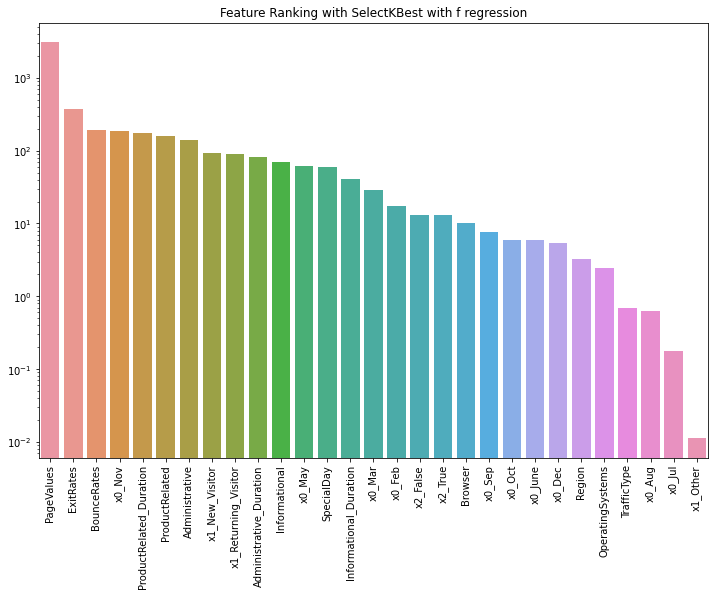

In [227]:
plot_feature_ranking(kbest_ranking,'Feature Ranking with SelectKBest with f regression','log')

Optimal number of features : 2


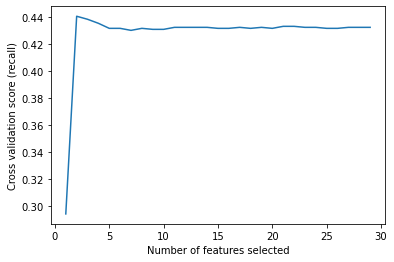

In [91]:
# Feature selection/evaluation based on wrapper method Recursive feature elimination with 
# cross-validation (RFECV) using SVC as estimator (method # 2)

# Create the RFE object and compute a cross-validated score.
lr = SVC(kernel='linear',random_state=43)


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=lr,
    step=1,
    cv=StratifiedKFold(3),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_process_df, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
);


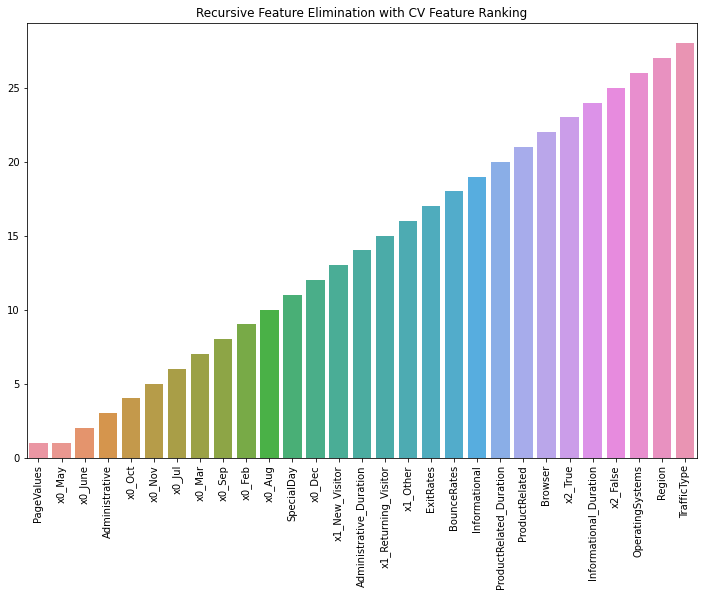

In [92]:
# Feature ranking based RFECV
rfecv_ranking = feature_ranking(X_train_process_df.columns,rfecv.ranking_,False)
plot_feature_ranking(rfecv_ranking,'Recursive Feature Elimination with CV Feature Ranking')

In [228]:
# Feature selection / evaluation based on summation of the absolute values of principal
# component loadings (method # 3)

pca = PCA(random_state=44)
pca.fit(X_train_process_df)

loadings = pd.DataFrame(
    data=abs(pca.components_.T) * pca.explained_variance_,
    columns=[f'PC{i}' for i in range(1, len(X_train_process_df.columns) + 1)],
    index=X_train_process_df.columns
)

loadings['Abs_Sum'] = loadings.apply(lambda x: x.sum(),axis=1)
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,Abs_Sum
Administrative,1.306911,0.087848,0.033634,0.251698,0.341420,0.323682,0.019569,0.051066,0.074670,0.013341,...,0.000343,0.000242,0.000011,0.000050,0.000063,0.000004,8.736349e-47,0.000000e+00,0.000000e+00,2.938167
Administrative_Duration,1.098764,0.147982,0.040586,0.353993,0.381991,0.444105,0.027981,0.080964,0.103885,0.005097,...,0.000209,0.000003,0.000162,0.000070,0.000007,0.000007,7.005802e-49,7.523998e-49,5.556183e-49,3.033733
Informational,1.208820,0.491132,0.052973,0.150456,0.467485,0.052324,0.025914,0.025711,0.036302,0.006720,...,0.000307,0.000071,0.000056,0.000201,0.000013,0.000010,5.572656e-48,6.710706e-49,8.991428e-49,2.889072
Informational_Duration,1.003595,0.513488,0.063819,0.158927,0.618819,0.049383,0.030129,0.034139,0.028565,0.008270,...,0.000127,0.000241,0.000175,0.000160,0.000011,0.000003,4.506826e-48,2.811248e-49,1.427497e-49,2.845448
ProductRelated,1.406086,0.275269,0.077526,0.384336,0.243425,0.334575,0.020802,0.096352,0.027258,0.018691,...,0.000217,0.000740,0.000163,0.000304,0.000202,0.000005,5.588118e-47,9.670677e-49,4.336431e-49,3.048272


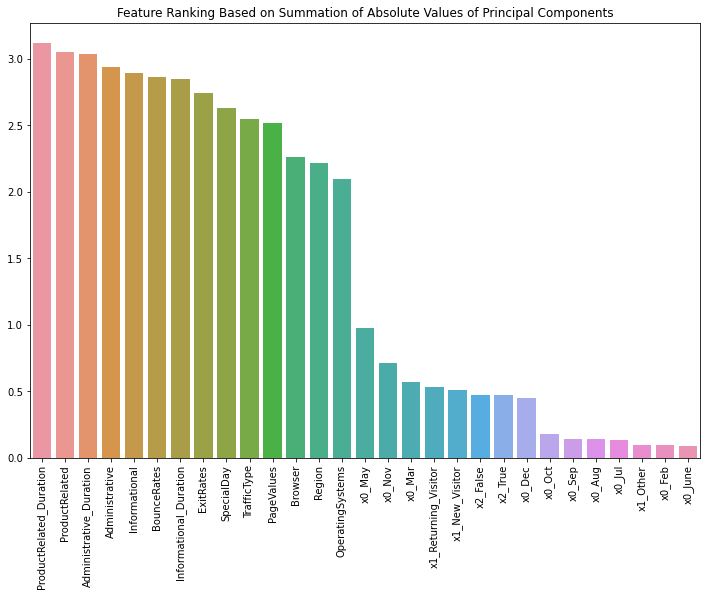

In [229]:
# Feature ranking based on summation of bbsolute values of principal components

pca_ranking = feature_ranking(list(loadings.index),
                              list(loadings['Abs_Sum']),True)

plot_feature_ranking(pca_ranking,
                     'Feature Ranking Based on Summation of Absolute Values of Principal Components')


In [230]:
# Correct for classification imbalance with SMOTE (method # 1)

sm = SMOTE(random_state=41,k_neighbors=3)
X_train_sm, y_train_sm = sm.fit_resample(X_train_process_df, y_train)
X_train_sm2,y_train_sm2 = sm.fit_resample(X_train_process_df2,y_train)

# Correct for classification imbalance with RandomOverSampler (method # 2)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_process_df, y_train)
X_train_ros2, y_train_ros2 = ros.fit_resample(X_train_process_df2, y_train)


In [41]:
# Display validation results for train sample

def display_validation_results(results,model_name,train_time):
    v_recall = results['mean_test_recall'].mean()
    v_accuracy = results['mean_test_accuracy'].mean()
    v_precision = results['mean_test_precision'].mean()
    
    print('='*60)
    print(f'Validation results for: {model_name}')
    print(f'Recall: {v_recall}\nAccuracy: {v_accuracy}\nPrecision: {v_precision}')
    stop_time = time.time()
    print(f'\nTraining time for {model_name} took {train_time} seconds.\n')


In [231]:
# Display prediction results for test sample

def display_test_predictions(actuals, predictions, model_name):
    t_recall = recall_score(actuals, predictions)
    t_accuracy = accuracy_score(actuals,predictions)
    t_precision = precision_score(actuals,predictions)
    
    print(f'Test sample predictions result for: {model_name}')
    print(f'Recall: {t_recall}\nAccuracy: {t_accuracy}\nPrecision: {t_precision}\n')
    

In [232]:
def display_confusion_matrix(actuals,predictions,model_name):
    
    conf_matrix = confusion_matrix(actuals, predictions)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    ax.xaxis.set_ticks_position('bottom')
    plt.title(f'Confusion Matrix for: {model_name}', fontsize=18);
    #save_image_as = 'SVC_' + company_name
    #fig.savefig(save_image_as)
    

In [233]:
# Diplay Roc curve

def display_roc_curve(model):
    
    fpr, tpr, _ = metrics.roc_curve(model[0], model[1])
    auc = round(metrics.roc_auc_score(model[0], model[1]), 2)
    name_auc = model[2] + ' AUC: ' + str(auc)
    plt.plot(fpr,tpr,label=name_auc)
    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    #for model in model_list:
    #    plot_roc_curve(model[0],model[1],model[2],name=model[3])
    

In [268]:
# DummyClassifier
# Create a pipe for base model and incorporate it into gridsearchcv

start = time.time()


base_grid_search = GridSearchCV(estimator=DummyClassifier(),
                                param_grid= {'random_state' : [1234],
                                            'strategy' : ['prior']},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
base_grid_search.fit(X_train_process_df,y_train)

model_name = 'DummyClassifier'


stop = time.time()

/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation results for: DummyClassifier
Recall: 0.0
Accuracy: 0.8436146698221154
Precision: 0.0

Training time for DummyClassifier took 0.041004180908203125 seconds.

Test sample predictions result for: DummyClassifier
Recall: 0.0
Accuracy: 0.843801201529219
Precision: 0.0



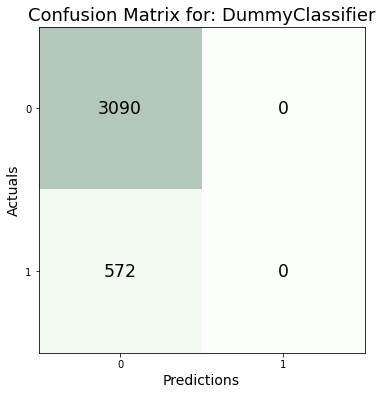

In [269]:
# Predict for X_test samples and display results
base_y_test_pred = base_grid_search.predict(X_test_process_df)


display_validation_results(base_grid_search.cv_results_,model_name,stop-start)
display_test_predictions(y_test, base_y_test_pred, model_name)
display_confusion_matrix(y_test, base_y_test_pred, model_name)


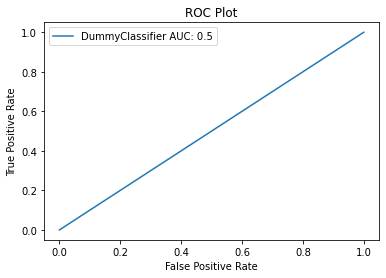

In [270]:
# Display ROC curve

base_models = []

if model_name not in base_models:
    base_models.append((y_test,base_y_test_pred,model_name))

for model in base_models:
    display_roc_curve(model)


In [271]:
# MultinomialNB
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
mn_grid_search.fit(X_train_process_df2,y_train) # X_train_process2_df is scaled with min_max

model_name2 = 'MultinomialNB'


stop = time.time()


Validation results for: MultinomialNB
Recall: 0.03293085136117167
Accuracy: 0.8470093580890806
Precision: 0.746808420337832

Training time for MultinomialNB took 0.08219408988952637 seconds.

Test sample predictions result for: MultinomialNB
Recall: 0.045454545454545456
Accuracy: 0.8495357728017476
Precision: 0.8387096774193549



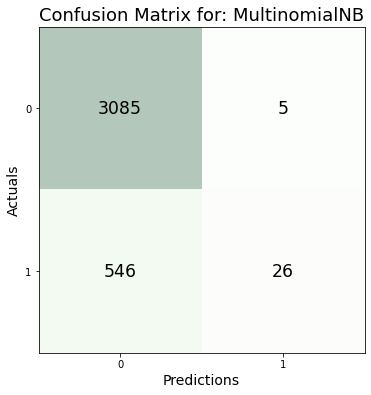

In [272]:
# Predict for X_test samples and display results
mn_y_test_pred = mn_grid_search.predict(X_test_process_df2)


display_validation_results(mn_grid_search.cv_results_,model_name2,stop-start)
display_test_predictions(y_test, mn_y_test_pred, model_name2)
display_confusion_matrix(y_test, mn_y_test_pred, model_name2)


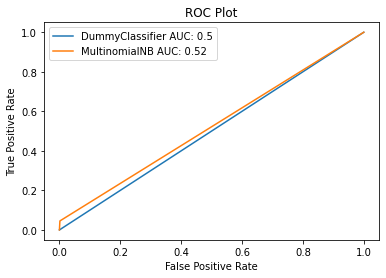

In [273]:
# Display ROC curve

if model_name not in base_models:
    base_models.append((y_test,mn_y_test_pred,model_name2))
    
for model in base_models:    
    display_roc_curve(model)


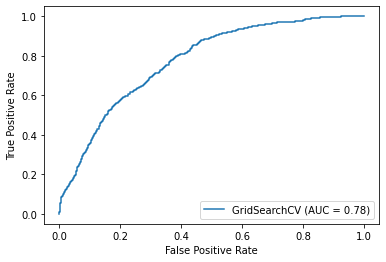

In [193]:
# Why plot_roc_curve gives a different result that fpr, tpr, 
# thresholds = metrics.roc_curve(y_test,mn_y_test_pred)method 

plot_roc_curve(mn_grid_search,X_test_process_df2,y_test);

In [274]:
# MultinomialNB with SMOTE sample balance
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


sm_mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
sm_mn_grid_search.fit(X_train_sm2,y_train_sm2) # X_train_process2_df is scaled with min_max

model_name3 = 'MultinomialNB + SMOTE'


stop = time.time()


Validation results for: MultinomialNB + SMOTE
Recall: 0.7388647889574296
Accuracy: 0.6871091706798786
Precision: 0.6697390364037293

Training time for MultinomialNB + SMOTE took 0.09944701194763184 seconds.

Test sample predictions result for: MultinomialNB + SMOTE
Recall: 0.756993006993007
Accuracy: 0.6572910977607864
Precision: 0.27953518398967075



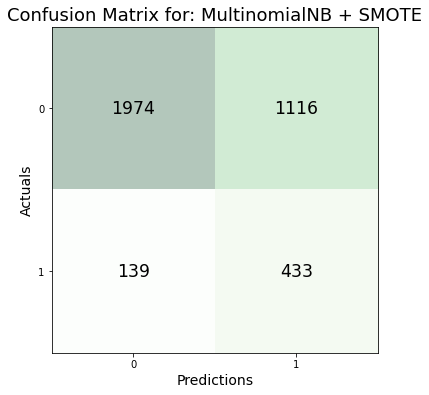

In [275]:
# Predict for X_test samples and display results
sm_mn_y_test_pred = sm_mn_grid_search.predict(X_test_process_df2)


display_validation_results(sm_mn_grid_search.cv_results_,model_name3,stop-start)
display_test_predictions(y_test, sm_mn_y_test_pred, model_name3)
display_confusion_matrix(y_test, sm_mn_y_test_pred, model_name3)


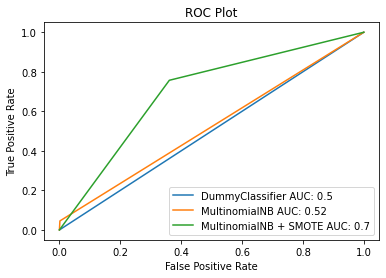

In [276]:
# Display ROC curve

if model_name not in base_models:
    base_models.append((y_test,sm_mn_y_test_pred,model_name3))
    
for model in base_models:    
    display_roc_curve(model)


In [277]:
# MultinomialNB with ROS sample balance
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


ros_mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
ros_mn_grid_search.fit(X_train_ros2,y_train_ros2)

model_name4 = 'MultinomialNB + ROS'


stop = time.time()


Validation results for: MultinomialNB + ROS
Recall: 0.7439963578998634
Accuracy: 0.690924544393021
Precision: 0.6727252176684899

Training time for MultinomialNB + ROS took 0.10106611251831055 seconds.

Test sample predictions result for: MultinomialNB + ROS
Recall: 0.7622377622377622
Accuracy: 0.6619333697433096
Precision: 0.2834850455136541



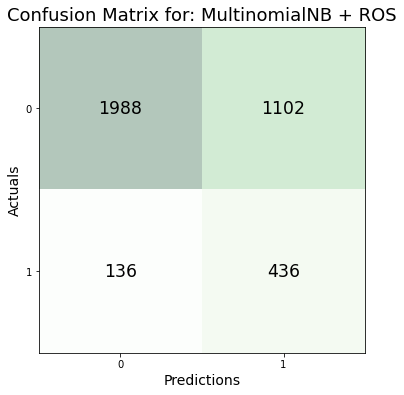

In [278]:
# Predict for X_test samples and display results
ros_mn_y_test_pred = ros_mn_grid_search.predict(X_test_process_df2)


display_validation_results(ros_mn_grid_search.cv_results_,model_name4,stop-start)
display_test_predictions(y_test, ros_mn_y_test_pred, model_name4)
display_confusion_matrix(y_test, ros_mn_y_test_pred, model_name4)


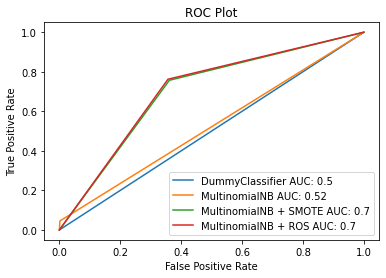

In [279]:
# Display ROC curve

if model_name not in base_models:
    base_models.append((y_test,ros_mn_y_test_pred,model_name4))
    
for model in base_models:    
    display_roc_curve(model)
